# day 63

# difference between Linear Regression and Logistic Regression

# Linear
* Linear Regression is used for making predictions in continuous variable.

# Logistic

* Logistic Regression is used for making predictions in categorical data (especially of binary type). the main goal of logistic regression is to establish relationship between X features(dependant variables) and probability of occurence of a binary outcome. the outcome value would generally vary between 0 and 1.  eg predicting the probability of rain based on rain in neighboring regions, season, humidity, temperature rise or fall variations, unpredictable global events and their profound consequences in rain. (whether or not it will rain, based on all these features).

* there are few ways to convert the continuous data into categorical data. this process is known as discretization. 

* Logistic regression transforms the Linear Regression into a classification categorical model through the use of the function: 

# $$ \mathbf{\sigma(x)} = \mathbf{\frac{1}{1+e^{-x}}} $$ 

* logistic function is also known as sigmoid function. 

* logistic function was developed in 1830 to model population growth.

* logistic function implies the total capacity of any natural system. for example after a point in time the bacterial population in a petri dish would reach its max limit and  its reproduction,after sucking up all bits of space and nutrients available, further population growth stabilizes however some innovative bacteria may adopt to their harsh environment and produce toxins that would make the environment (in our case the petri dish) budge and release needful nutrients for the bacteria to sustain its growth. 

# converting linear regression into logistic regression

# $$ \text{step 1} \longrightarrow \hat{y} = \sigma(\sum_{i=0}^{n} B_{i}X_{i} ) $$

# $$ \text{step 2} \longrightarrow {\sigma(x)} = {\frac{1}{1+e^{-x}}} $$

# $$ \text{step 3} \longrightarrow \hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^{n} B_{i}X_{i}} } $$

# $$ \text{step 4} \longrightarrow e^{\sum_{i=0}^{n} B_{i}X_{i} } = \frac{\hat{y}}{1-\hat{y}} $$

# $$ \text{step 4} \longrightarrow \ln(\frac{\hat{y}}{1-\hat{y}}) = \sum_{i=0}^{n} B_{i}X_{i}  $$


# drawing conclusions

* if the coefficient of the feature is positive then its probability of making the prediction is positive. suppose we want to categorize our toys into red and blue. we noticed that most of the bigger toys are in Red category. if our coefficient of the size feature positive means as the size increase in value so would the probability of the target event. i.e as the size(feature) of the toys increases, the probability of the toy being red(target outcome) is more. 


* if the coefficient of the feature is negative then its probability of making the prediction of target outcome is against. which from our previous example means the size of the toys decrease as the probability of being Red increase. that means most of our bigger toys are blue. 

* bigger the coefficient value bigger its influence it has over getting to the target outcome. so we would compare the magnitude of each feature (its coefficient) with the other to see which has the most influence on predicting the target outcome.


# best fit with maximum likelihood estimation:

* the log function on sucess to failure ratio just converts the ratio to log scale. log scale converts the big number to small number and small number to big number. 

* ln(odds) is ln(y/1-y)

# $$ ln\frac{p}{(1-p)} = ln(odds) $$

# $$ \downarrow $$

# $$ \frac{p}{1-p} = e^{ln(odds)} $$

# $$ \downarrow $$

# $$ p = e^{ln(odds)} * (1-p) $$

# $$ \downarrow $$

# $$ p = e^{ln(odds)} - p*e^{ln(odds)} $$

# $$ \downarrow $$

# $$ p + p*e^{ln(odds)} = e^{ln(odds)} $$

# $$ \downarrow $$

# $$ p = \frac{e^{ln(odds)}}{1+e^{ln(odds)}} $$

# plot for visualizing the logistic function

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

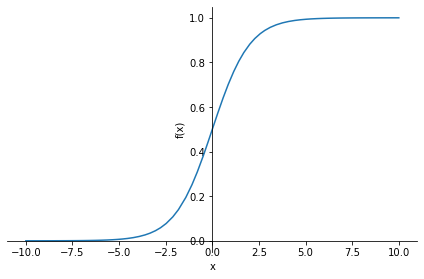

In [5]:
x = sym.symbols('x')

logistic_func = 1/(1+sym.exp(-x))

sym.plotting.plot(logistic_func);

# day 64

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

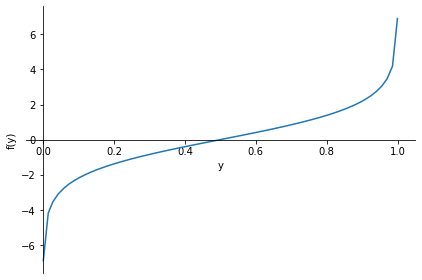

In [19]:
y = sym.symbols('y')

eq = sym.log(y/(1-y)) # by default it is of base 2 (natural log)

sym.plotting.plot(eq,(y,0.001,0.999)) # the values exist only between 0 and 1

plt.show()

# day 65

In [3]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('hearing_test.csv')
df.head()

# 1 means passed in hearing test
# 0 means failed.

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


# how many have passed the hearing test and how may have failed?

In [6]:
df['test_result'].value_counts()

# 3000 1's in other words 3000 have passed the test and 2000 have failed the test. 

1    3000
0    2000
Name: test_result, dtype: int64

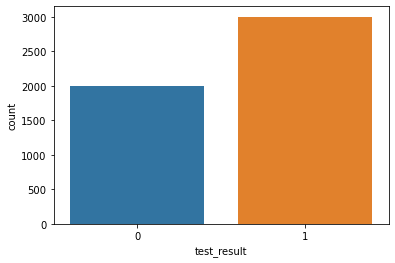

In [7]:
sns.countplot(data=df, x='test_result')

plt.show()

### categorize the people based on passing the hearing test and failing the hearing test and find out the median age of passing and failing

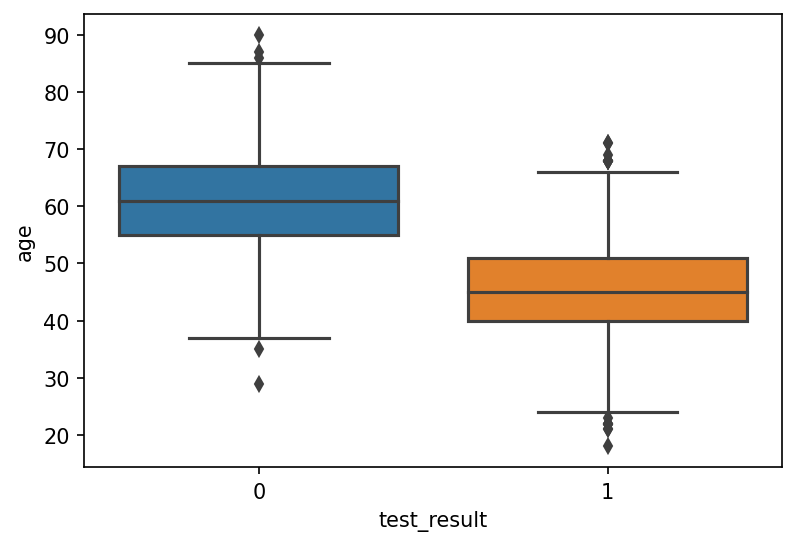

In [8]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result',y='age')

plt.show()

### categorize the people based on passing the hearing test and failing the hearing test and find out the median physical_score of passing and failing

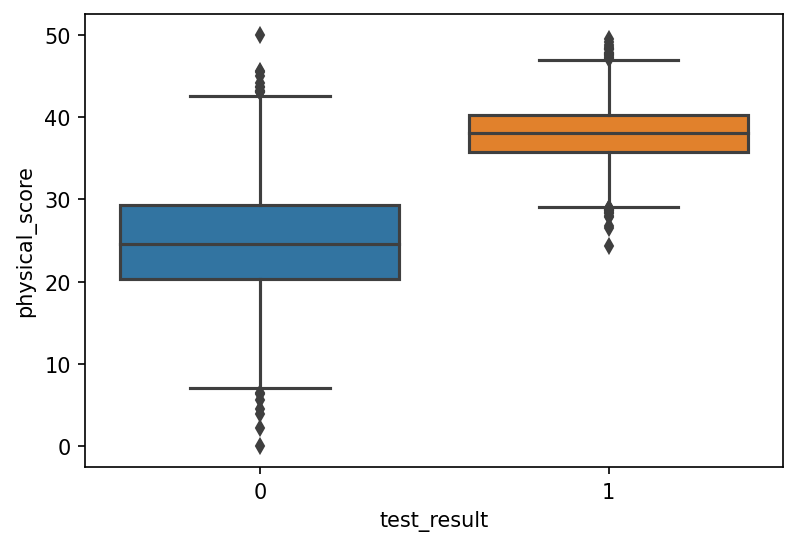

In [9]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result',y='physical_score')

plt.show()

### creating the pairplot to better visualize it

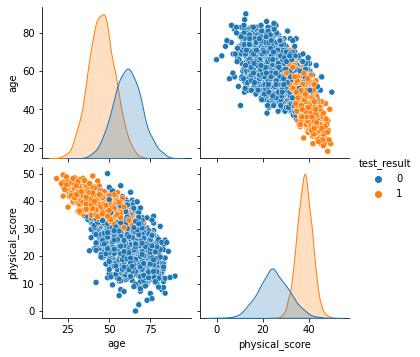

In [16]:

sns.pairplot(data=df,hue='test_result')
plt.show()

### producing the heatmap to see the correlation between different features of the DataFrame

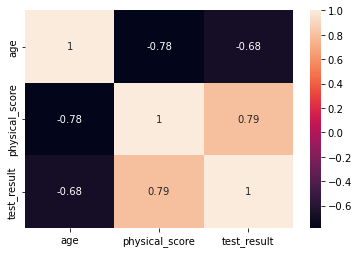

In [19]:
sns.heatmap(df.corr(),annot=True)

plt.show()

### 3d projecting

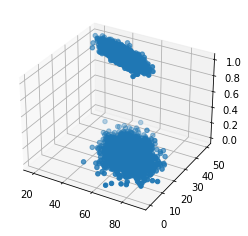

In [22]:
# 3d projecting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# plotting
ax.scatter(df['age'],df['physical_score'],df['test_result'])

plt.show()

### beautify the plot: color code it based on test_results

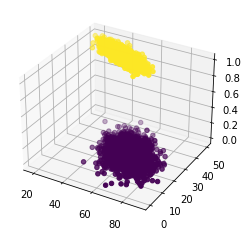

In [23]:
# 3d projecting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# plotting
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

plt.show()

# those who have passed the test are yellow, failed are purple

# day 66 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# model_training

In [3]:
# x features and y features setting
X = df.drop('test_result',axis=1)
y = df['test_result']

# test_train_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

# scaling the x features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # be mindful here to only train the x features not the y_features
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# logistic model_fitting
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)
log_model.predict(scaled_x_test)


array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

# classification metrics

* classification is forming a matrix of all possibilities of an outcome. i.e if a person takes a virus test assuming he may have the virus since he shows symptoms but, the test result shows negative. here there are possible outcomes real positive, real negative, false positive, false negative. classifying these four combination puttin them in a matrix format is all bout classification metrics.

# $$ 
\begin{aligned}
\begin{array}{|c|c|c|}
\hline
\textbf{Actual(col)/predicted(row)} & \textbf{Infected} & \textbf{Healthy} \\ 
\hline 
\textbf{Infected} & \text{True positive} & \text{False Positive}  \\ 
\hline
\textbf{Healthy}  & \text{False Negative}  &  \text{True Negative}\\
\hline
\end{array}  
\end{aligned}
$$


# $$ 
\begin{aligned}
\begin{array}{|c|c|c|}
\hline
\textbf{Actual(col)/predicted(row)} & \textbf{Infected} & \textbf{Healthy} \\ 
\hline 
\textbf{Infected} & \text{4} & \text{2}  \\ 
\hline
\textbf{Healthy}  & \text{1}  &  \text{93}\\
\hline
\end{array}  
\end{aligned}
$$

# Accuracy paradox:
* accuracy of the test = (True positive + True Negative )/Total, = (93+4)/100 = 97%.

* accuracy paradox: our measurement device doesn't measure the reality as is. lets say you have a machine learning model that learns all about the patterns of a fraud transaction, but remember there is a high chance that the model suspects a good man as a fraud based on his recent pattern because the fraud happens very less frequently that means the sample size to train the model on is so very small that exagerrating the sample result to a bigger population might tend to get erroneous at times. this is where precision and resolution helps to bolster the back-broken accuracy only reliant model.

# Resolution/Recall:
* True positives/Total positives = 4/5 = 80%

# precision:
* True positives/Total infected = 4/6 = 66.667%

# Accuracy, Precision,Resolution:
* Accuracy: how far way the points are from the target 
* Resolution: how many points are there
* precision: whether many points are close together.
* combination of accuracy, resolution and precision: many points lie at the heart of the target close together.

# f1 score.

# $$ f_1 = \frac{2*precision*recall}{precision+recall} $$

* if either precision or recall goes to 0 then the entire f score will become 0 that mean there is something wrong with oure model and we have to reset features of the confusion matrix.


# day 67 & day69

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


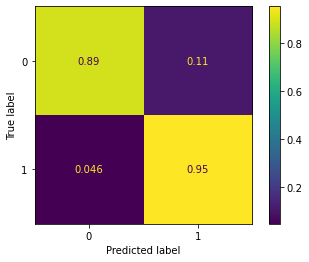

In [3]:
# x features and y features
X = df.drop('test_result',axis=1)
y = df['test_result']

# train_test_splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

# scaling the x_features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test =  scaler.transform(x_test)

# logistic model fitting
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)

actual = y_test
prediction = log_model.predict(scaled_x_test)

# importing important metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(actual,prediction) # it is just like error ratio but predicts how accurately the model works
confusion_matrix = confusion_matrix(actual,prediction)
classification = classification_report(actual,prediction)


# plotting the confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cv_display = ConfusionMatrixDisplay.from_estimator(log_model,scaled_x_test,y_test,normalize='true')

In [28]:
accuracy

0.93

In [29]:
confusion_matrix

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [31]:
print(classification)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



# study Accuracy,precision and recall thoroughly

* Accuracy just tells how many of the targets you reached out of the total number of observations (resolution). our model classifies different things under different labels, accuracy tells us how accurately the model classified each object out of the total observations(total observation here is # of all objects).i.e 4 apples / 12 fruits, 8 oranges/12 fruits.

* Resolution(# of observations) is different from recall.

* precision just tells you how many of target is found within the boundary of the model. total targets within model/ total observations within model. i.e lets say our target is apple, and under the classified area the model has 2 apples and 4 oranges, so   precision would be   2 apples/6 fruits

* recall tells you how many targets you reached within the model over the total number of targets in the whole observations. total targets within the model/ total number of targets among all data points. our model has 3 apples and 8 oranges but according the recall formula we have to count only the apples over the total number of apples scattered throughout the observation so, 3 apples/ 4 total apples. 

* accuracy: 4/12
* precision: 2/6
* recall: 3/4

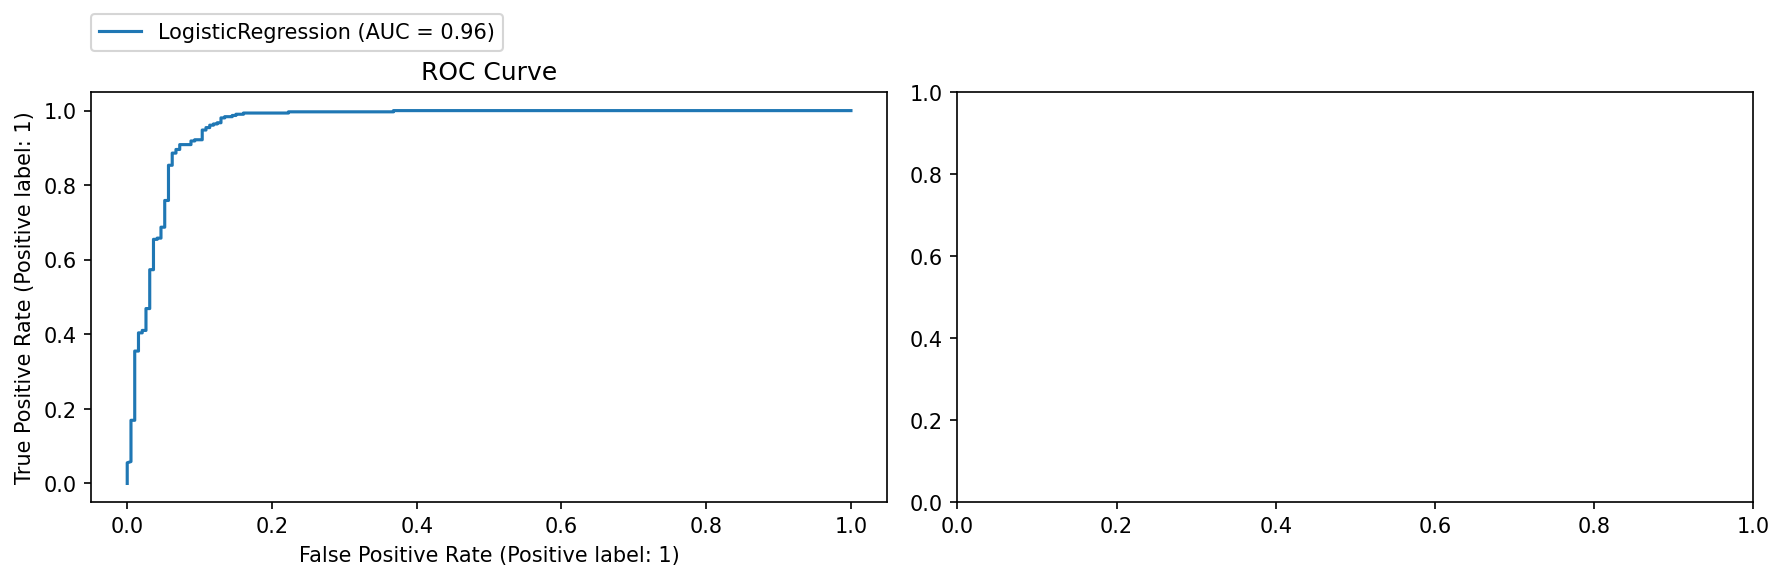

In [22]:
from sklearn.metrics import RocCurveDisplay
fig,ax = plt.subplots(1,2,dpi=150,figsize=(12,4))

RocCurveDisplay.from_estimator(log_model,scaled_x_test,y_test,ax=ax[0])


ax[0].set_title('ROC Curve')
ax[0].legend(loc=(0,1.1))


plt.tight_layout()

plt.show()

# multi class classification with logistic regression

In [23]:
df = pd.read_csv('iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### in case we stumble upon a new flower in the future and we record its features (sepal_length,petal_length etc) can we predict what flower it is from the database wihout having to bother some professor of biology to know the answer!

### plotting the features

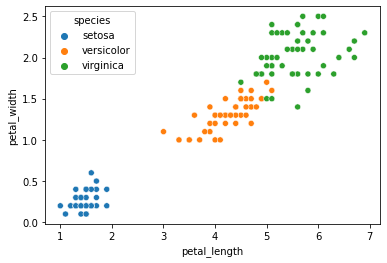

In [28]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')


plt.show()

### pairplotting

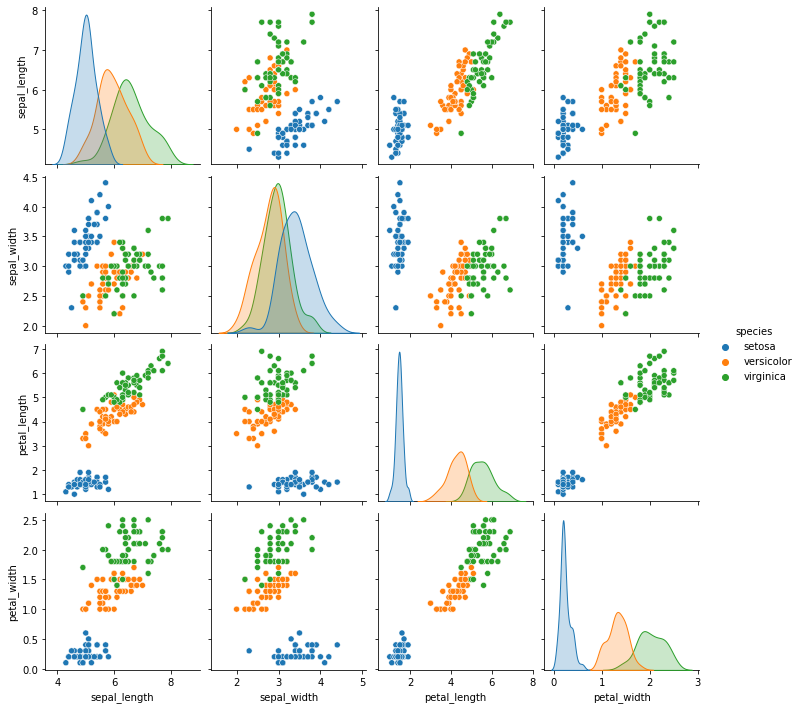

In [30]:
sns.pairplot(data=df,hue='species')

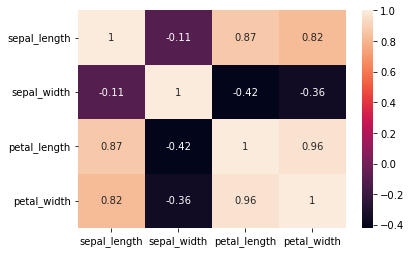

In [32]:
sns.heatmap(df.corr(),annot=True)

plt.show()

### model building

In [1]:
# opening the dataframe
df = pd.read_csv('iris.csv')

# features
x = df.drop('species',axis=1)
y = df['species']

# train_test_split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42 )


# scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# model fitting
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='saga',multi_class='ovr', # 'saga'-stochastic average gradient, 'ovr'-one versus rest
                               max_iter=5000) # since we have three types of outputs (not binary)


# gridsearch
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2','net_elastic']
l1_ratio  = np.linspace(0,1,100)
C = np.logspace(0,10,20) # c value controls how much you want to avoid overfitting.
param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':C}
grid_model = GridSearchCV(estimator=log_model,param_grid=param_grid)

grid_model.fit(scaled_x_train,y_train)

prediction = grid_model.predict(scaled_x_test)
actual = y_test



NameError: name 'pd' is not defined

In [12]:
grid_model.best_params_

{'C': 37.926901907322495, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [14]:
# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

accuracy_score(actual,prediction)


In [15]:
confusion_matrix(actual,prediction)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [17]:
print(classification_report(actual,prediction))

# it is the ideal perfect model. it is too good to be true.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



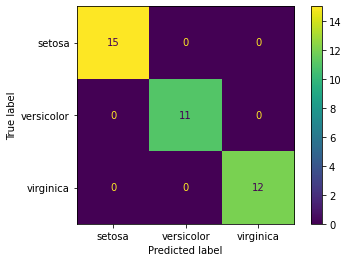

In [19]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_x_test,y_test)
plt.show()